In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import os
import datetime
import sklearn
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [3]:
chd = os.chdir('C:/Users/UvA/Waternet/data/')
CURR_DIR = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [24]:
# Read data  
df = pd.read_excel(CURR_DIR + '\current\Prognose Levering Nieuwe Stijl (concept 2019).xlsx', skiprows = range(1, 5), sheet_name='Prognose  Levering')

In [32]:
df.head()

,NaN,NaN,NaN,m3's,m3's,m3's,m3's,m3's,m3's,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,huishoudens m3,aantal,aantal personen,gemiddeld per hh,lhd,met %,aantal,zonder %,aantal
0,NaN,NaN,NaN,m3's,m3's,m3's,m3's,m3's,m3's,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,huishoudens m3,aantal,aantal personen,gemiddeld per hh,lhd,met %,aantal,zonder %,aantal
1,NaN,levering/rekening,2016.0,92400000,1800000,90600000,18200000,72400000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49200000,NaN,4.92246e+07,NaN,1010470,NaN,133.1,NaN,NaN,NaN,NaN
2,NaN,levering/rekening,2017.0,92860000,1640000,91220000,18620000,72600000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48700000,NaN,48700000,484598,1023471,2.112,130.1,NaN,NaN,NaN,NaN
3,NaN,prognose/begroting,2018.0,93485404,1900000,91585404,17700000,73885404,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20602500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50282904,NaN,5.02829e+07,490125,1032694,2.107,133.4,NaN,NaN,NaN,NaN
4,NaN,prognose 1 feb,2018.0,93400000,1700000,91700000,18200000,73500000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49500000,NaN,4.95089e+07,492591,1035427,2.102,131,NaN,NaN,NaN,NaN


In [27]:
names = df.iloc[0]

In [28]:
df.columns = names

In [33]:
df = df[1:]

In [34]:
df.head()

,NaN,NaN,NaN,m3's,m3's,m3's,m3's,m3's,m3's,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,m3's,aantal,huishoudens m3,aantal,aantal personen,gemiddeld per hh,lhd,met %,aantal,zonder %,aantal
1,NaN,levering/rekening,2016.0,92400000,1800000,90600000,18200000,72400000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49200000,NaN,4.92246e+07,NaN,1010470,NaN,133.1,NaN,NaN,NaN,NaN
2,NaN,levering/rekening,2017.0,92860000,1640000,91220000,18620000,72600000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48700000,NaN,48700000,484598,1023471,2.112,130.1,NaN,NaN,NaN,NaN
3,NaN,prognose/begroting,2018.0,93485404,1900000,91585404,17700000,73885404,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20602500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50282904,NaN,5.02829e+07,490125,1032694,2.107,133.4,NaN,NaN,NaN,NaN
4,NaN,prognose 1 feb,2018.0,93400000,1700000,91700000,18200000,73500000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49500000,NaN,4.95089e+07,492591,1035427,2.102,131,NaN,NaN,NaN,NaN
5,NaN,prognose 1 aug,2018.0,23800000,1700000,22100000,19100000,3000000,3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9821e+07,494989,1037992,2.097,131.5,NaN,NaN,NaN,NaN


In [133]:
df_year = df.iloc[:, 2]
df_demand = df.iloc[:,33]
df_type = df.iloc[:,1]
df2 = pd.concat([df_year, df_demand, df_type], axis=1, names=['jaar', 'demans','type'])
df2.columns = ['year', 'demand','type']

In [181]:
df2

,year,demand,type
1,2016,49224641,levering/rekening
2,2017,48700000,levering/rekening
3,2018,50282903,prognose/begroting
4,2018,49508942,prognose 1 feb
5,2018,49821021,prognose 1 aug
6,2018,49951000,levering/rekening
7,2019,50191508,prognose/begroting
8,2020,50844225,prognose
9,2021,51079843,prognose
10,2022,51441349,prognose


In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 1 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    23 non-null     int32 
 1   demand  23 non-null     int32 
 2   type    23 non-null     object
dtypes: int32(2), object(1)
memory usage: 500.0+ bytes


In [178]:
df2.isnull().any()

year      False
demand    False
type      False
dtype: bool

In [ ]:
df2 = df2[:23]

In [ ]:
df2.isnull().any()

In [179]:
df2['year'] = df2['year'].astype('int')

In [183]:
df2['type'] = df2['type'].astype('str') 
df2['demand'] = df2['demand'].astype(int)

In [184]:
df2actual = df2[(df2['type'] == 'levering/rekening')]
df2prog = df2[df2['type'].str.contains("prog")]

In [185]:
df2prog

,year,demand,type
3,2018,50282903,prognose/begroting
4,2018,49508942,prognose 1 feb
5,2018,49821021,prognose 1 aug
7,2019,50191508,prognose/begroting
8,2020,50844225,prognose
9,2021,51079843,prognose
10,2022,51441349,prognose
11,2023,51800895,prognose
12,2024,52282540,prognose
13,2025,52456342,prognose


In [186]:
df2actual

,year,demand,type
1,2016,49224641,levering/rekening
2,2017,48700000,levering/rekening
6,2018,49951000,levering/rekening


In [173]:
df2.isnull().any()

year      False
demand    False
type      False
dtype: bool

In [193]:
# prepare train & test set
X = df2.drop(columns=['demand','type'])
y = df2.demand
y = np.array(y).reshape(-1)

print(X.shape,y.shape)



(23, 1) (23,)


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [209]:
# fit the model
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
pred3 = lr3.predict(X_test)
pred3[:10]

array([54559438.16425157, 53653515.09993446, 50029822.84266615,
       52445617.68084502, 54257463.80947924])

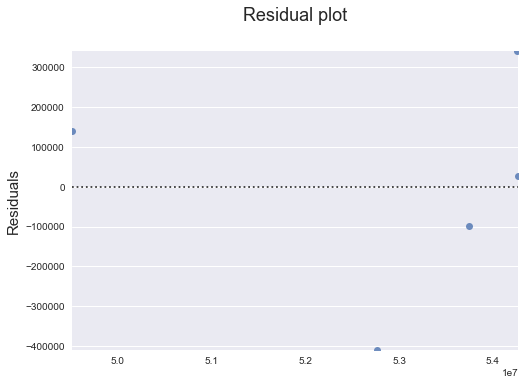

In [202]:
sns.residplot(y_test, lr3.predict(X_test))
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

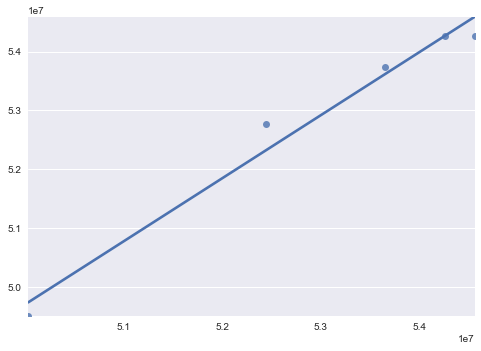

In [203]:
sns.regplot(pred3, y_test, ci=None)

In [206]:
print('MAE:', mean_absolute_error(y_test, lr3.predict(X_test)))
print('Train:', lr3.score(X_train, y_train))
print('Test:', lr3.score(X_test, y_test))
print('MSE:' ,mean_squared_error(y_test,pred3)**(1/2))

MAE: 248460.68333179952
Train: 0.953258363111081
Test: 0.9704751392231215
MSE: 306878.541961316


In [211]:
print(lr3.intercept_)

-559354425.0879687


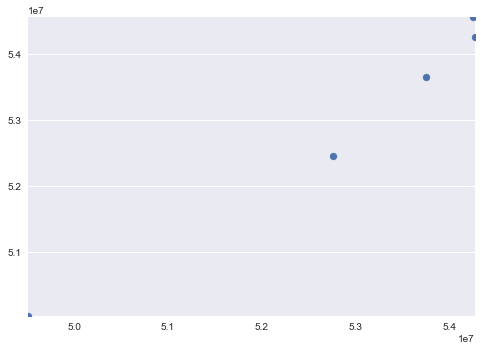

In [214]:
preds = lr3.predict(X_test)
plt.scatter(y_test,preds)

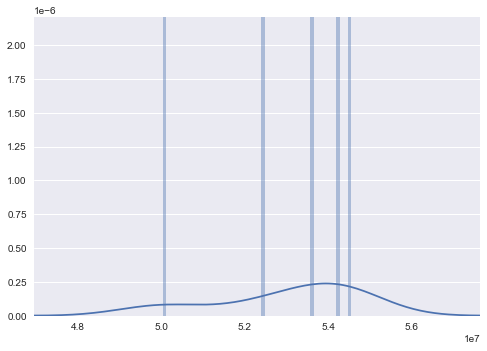

In [216]:
sns.distplot((preds),bins=50);

In [219]:
fit = ols('demand ~ year+ + type', data=df2).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.58e-14
Time:                        10:22:30   Log-Likelihood:                -317.28
No. Observations:                  23   AIC:                             646.6
Df Residuals:                      17   BIC:                             653.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -4.623e+08      3e+07    -15.387      0.000   -5.26e+08   -3.99e+08
type[T.prognose]            1.039e+06   2.34e+05      4.447      0.000    5.46e+05    1.53e+06
type[T.prognose 1 aug]      2.755e+05   3.19e+05      0.865      0.399   -3.97e+05    9.48e+05
type[T.prognose 1 feb]     -3.657e+04   3.19e+05     -0.115      0.910   -7.09e+05    6.36e+05
type[T.prognose/begroting]  5.649e+05   2.53e+05      2.236      0.039    3.19e+04     1.1e+06
year                        2.536e+05   1.49e+04     17.028      0.000    2.22e+05    2.85e+05
==============================================================================
Omnibus:                        1.761   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.177
Skew:                          -0.551   Prob(JB):                        0.555
Kurtosis:                       2.875   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""